In [ ]:
import sys
!{sys.executable} -m pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import sys
sys.path.append("../")

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print("Beginning Data Retrieval")
print("-------------------------")
base_url = "http://api.openweathermap.org/data/2.5/weather"
query_params = {}
query_params['appid'] = weather_api_key
query_params['units'] = 'imperial'
print(weather_api_key)
i = 0
cols = ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date']
df = pd.DataFrame()
for city in cities:
    try:
        query_params['q'] = city
        print(f"Processing Record {i} | {city}")
        response = requests.get(base_url, params=query_params)
        data = response.json()
        res_list = []
        res_list.append(city)
        res_list.append(data['coord']['lat'])
        res_list.append(data['coord']['lon'])
        res_list.append(data['main']['temp_max'])
        res_list.append(data['main']['humidity'])
        res_list.append(data['clouds']['all'])
        res_list.append(data['wind']['speed'])
        res_list.append(data['sys']['country'])
        res_list.append(data['dt'])
        ser = pd.Series(res_list, index=cols)
        df = df.append(ser, ignore_index=True)
        i += 1
    except Exception as e:
        print(f"Error processing city {i} {city}...")

df.head()

Beginning Data Retrieval
-------------------------
af3b614283e3aa84cf172d6d0ea5f73a
Processing Record 0 | victoria
Processing Record 1 | busselton
Processing Record 2 | puerto ayora
Processing Record 3 | mackay
Processing Record 4 | atuona
Processing Record 5 | alofi
Processing Record 6 | saint-philippe
Processing Record 7 | rikitea
Processing Record 8 | ushuaia
Processing Record 9 | japura
Processing Record 10 | esperance
Processing Record 11 | valleyview
Processing Record 12 | mar del plata
Processing Record 13 | nikolskoye
Processing Record 14 | punta arenas
Processing Record 15 | tsihombe
Error processing city 15 tsihombe...
Processing Record 15 | barrow
Processing Record 16 | ponta do sol
Processing Record 17 | arroyos y esteros
Processing Record 18 | qaanaaq
Processing Record 19 | athabasca
Processing Record 20 | new norfolk
Processing Record 21 | taolanaro
Error processing city 21 taolanaro...
Processing Record 21 | yellowknife
Processing Record 22 | pevek
Processing Record 23 |

Processing Record 204 | katsuura
Processing Record 205 | riyadh
Processing Record 206 | sierpc
Processing Record 207 | mucurapo
Processing Record 208 | kawalu
Processing Record 209 | pisco
Processing Record 210 | cayenne
Processing Record 211 | saint anthony
Processing Record 212 | suez
Processing Record 213 | sibu
Processing Record 214 | arraial do cabo
Processing Record 215 | garowe
Processing Record 216 | port lincoln
Processing Record 217 | nelson bay
Processing Record 218 | illoqqortoormiut
Error processing city 218 illoqqortoormiut...
Processing Record 218 | klaksvik
Processing Record 219 | nhulunbuy
Processing Record 220 | lima
Processing Record 221 | grand centre
Error processing city 221 grand centre...
Processing Record 221 | saldanha
Processing Record 222 | batagay-alyta
Processing Record 223 | gat
Processing Record 224 | port macquarie
Processing Record 225 | timizart
Processing Record 226 | chingola
Processing Record 227 | vila franca do campo
Processing Record 228 | bered

Processing Record 428 | camana
Processing Record 429 | terme
Processing Record 430 | half moon bay
Processing Record 431 | brae
Processing Record 432 | bizhbulyak
Processing Record 433 | manacapuru
Processing Record 434 | dalby
Processing Record 435 | ust-maya
Processing Record 436 | mitchell
Processing Record 437 | talnakh
Processing Record 438 | inverell
Processing Record 439 | hami
Processing Record 440 | ust-karsk
Processing Record 441 | ketchikan
Processing Record 442 | wilmington
Processing Record 443 | flinders
Processing Record 444 | the pas
Processing Record 445 | fare
Processing Record 446 | grootfontein
Processing Record 447 | prince rupert
Processing Record 448 | axim
Processing Record 449 | mehamn
Processing Record 450 | kushima
Processing Record 451 | key west
Processing Record 452 | amga
Processing Record 453 | kingman
Processing Record 454 | calvinia
Processing Record 455 | esik
Processing Record 456 | haibowan
Error processing city 456 haibowan...
Processing Record 456

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,victoria,95.0,HK,1.622317e+09,89.0,22.2855,114.1577,85.96,1.01
1,busselton,94.0,AU,1.622318e+09,93.0,-33.6500,115.3333,54.09,13.91
2,puerto ayora,59.0,EC,1.622317e+09,84.0,-0.7393,-90.3518,82.36,5.99
3,mackay,90.0,AU,1.622318e+09,82.0,-21.1500,149.2000,65.68,12.66
4,atuona,6.0,PF,1.622318e+09,72.0,-9.8000,-139.0333,78.75,9.80


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

df.to_csv('city_weather.csv', index=False)
df.head()

In [5]:
def create_summary(data_frame):
    summary_df = pd.DataFrame()
    summary_df = summary_df.append(data_frame.count(), ignore_index=True)
    summary_df = summary_df.append(data_frame.mean(), ignore_index=True)
    summary_df = summary_df.append(data_frame.std(), ignore_index=True)
    summary_df = summary_df.append(data_frame.min(), ignore_index=True)
    first_qrt = data_frame.quantile(0.25)
    second_qrt  = data_frame.quantile(0.5)
    third_qrt = data_frame.quantile(0.75)
    summary_df = summary_df.append(first_qrt, ignore_index=True)
    summary_df = summary_df.append(second_qrt, ignore_index=True)
    summary_df = summary_df.append(third_qrt, ignore_index=True)
    summary_df = summary_df.append(data_frame.max(), ignore_index=True)
    del summary_df['City']
    del summary_df['Country']
    summary_df.index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    return summary_df

summary_data_frame = create_summary(df)
summary_data_frame

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000
mean,55.758993,1.622318e+09,68.437050,19.836416,12.694720,66.134173,8.151817
std,38.482141,8.637090e+01,22.970674,32.796511,87.701529,16.950046,5.521983
min,0.000000,1.622317e+09,6.000000,-54.800000,-175.200000,18.610000,0.000000
25%,16.000000,1.622318e+09,57.000000,-7.890350,-61.698075,53.197500,3.865000
50%,65.500000,1.622318e+09,75.000000,24.324550,19.451800,66.605000,6.910000
75%,93.250000,1.622318e+09,86.000000,47.031200,81.429300,80.157500,11.500000
max,100.000000,1.622318e+09,100.000000,78.218600,178.416700,104.650000,36.890000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
df_humidity = df[df['Humidity'] <= 100]
summary_data_frame = create_summary(df_humidity)
summary_data_frame

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,556.000000,5.560000e+02,556.000000,556.000000,556.000000,556.000000,556.000000
mean,55.758993,1.622318e+09,68.437050,19.836416,12.694720,66.134173,8.151817
std,38.482141,8.637090e+01,22.970674,32.796511,87.701529,16.950046,5.521983
min,0.000000,1.622317e+09,6.000000,-54.800000,-175.200000,18.610000,0.000000
25%,16.000000,1.622318e+09,57.000000,-7.890350,-61.698075,53.197500,3.865000
50%,65.500000,1.622318e+09,75.000000,24.324550,19.451800,66.605000,6.910000
75%,93.250000,1.622318e+09,86.000000,47.031200,81.429300,80.157500,11.500000
max,100.000000,1.622318e+09,100.000000,78.218600,178.416700,104.650000,36.890000


In [10]:
#  Get the indices of cities that have humidity over 100%.
df_over_humidity = df[df['Humidity'] > 100]
indices = df_over_humidity.index.values
indices

array([], dtype=int64)

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
lowerq = df['Humidity'].quantile(0.25)
upperq = df['Humidity'].quantile(0.75)
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
clean_city_data = df[(df['Humidity'] <= upper_bound) & (df['Humidity'] >= lower_bound)]
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,victoria,95.0,HK,1.622317e+09,89.0,22.2855,114.1577,85.96,1.01
1,busselton,94.0,AU,1.622318e+09,93.0,-33.6500,115.3333,54.09,13.91
2,puerto ayora,59.0,EC,1.622317e+09,84.0,-0.7393,-90.3518,82.36,5.99
3,mackay,90.0,AU,1.622318e+09,82.0,-21.1500,149.2000,65.68,12.66
4,atuona,6.0,PF,1.622318e+09,72.0,-9.8000,-139.0333,78.75,9.80
...,...,...,...,...,...,...,...,...,...
549,caucaia,20.0,BR,1.622318e+09,74.0,-3.7361,-38.6531,84.15,6.40
551,hong gai,100.0,VN,1.622318e+09,93.0,20.9560,107.0946,85.91,4.90
553,gorontalo,94.0,ID,1.622318e+09,95.0,0.5412,123.0595,74.98,2.15
554,uhlove,100.0,UA,1.622318e+09,88.0,44.8215,33.6045,64.56,5.61


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

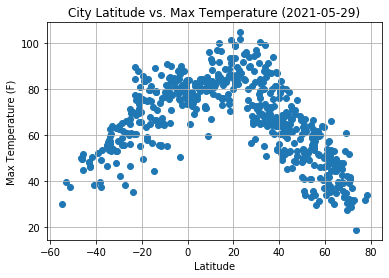

In [19]:
from datetime import date
x_values = df['Lat']
y_values = df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
date_run = df.iloc[0, 3]
date_run = date.fromtimestamp(date_run)
plt.title(f'City Latitude vs. Max Temperature ({date_run})')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

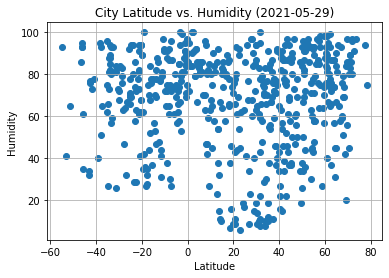

In [20]:
x_values = df['Lat']
y_values = df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date_run})')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

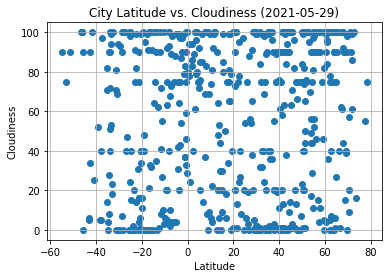

In [22]:
x_values = df['Lat']
y_values = df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date_run})')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

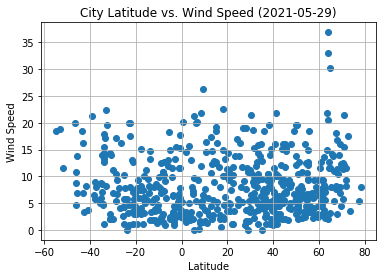

In [23]:
x_values = df['Lat']
y_values = df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date_run})')
plt.grid()
plt.show()

## Linear Regression

In [24]:
northern_df = df[df['Lat'] > 0]
southern_df = df[df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8022438102761531


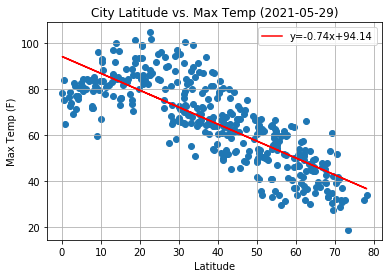

In [51]:
def plot_regression(lat_s, y_s, y_label, y_units):
    m_slope, m_int, m_r, m_p, m_std_err = linregress(lat_s, y_s)
    m_fit = m_slope * lat_s + m_int
    print(f"The r-value is {m_r}")
    plt.scatter(lat_s, y_s)
    plt.plot(lat_s, m_fit, color="r", label='y={:.2f}x+{:.2f}'.format(m_slope,m_int))
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label} ({y_units})')
    plt.title(f'City Latitude vs. {y_label} ({date_run})')
    plt.grid()
    plt.legend(loc='best')
    plt.show()
    
plot_regression(northern_df['Lat'], northern_df['Max Temp'], 'Max Temp', 'F')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7750698906573634


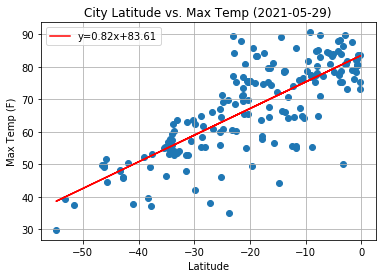

In [52]:
plot_regression(southern_df['Lat'], southern_df['Max Temp'], 'Max Temp', 'F')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.11504682877851331


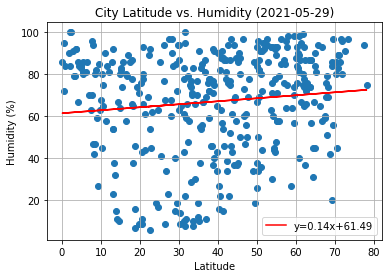

In [53]:
plot_regression(northern_df['Lat'], northern_df['Humidity'], 'Humidity', '%')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.08326195662375019


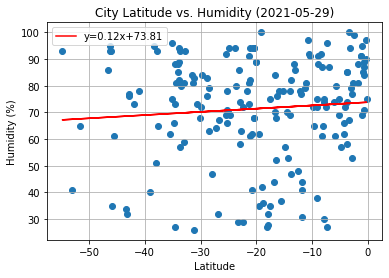

In [54]:
plot_regression(southern_df['Lat'], southern_df['Humidity'], 'Humidity', '%')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.056544491436219986


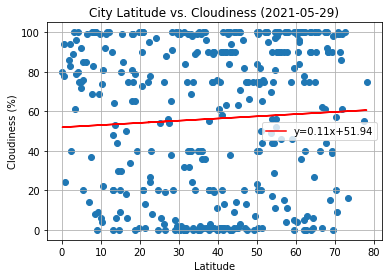

In [55]:
plot_regression(northern_df['Lat'], northern_df['Cloudiness'], 'Cloudiness', '%')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.05565910754927063


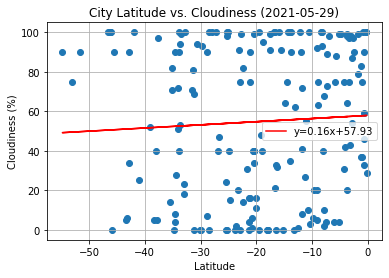

In [56]:
plot_regression(southern_df['Lat'], southern_df['Cloudiness'], 'Cloudiness', '%')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.08299254617028777


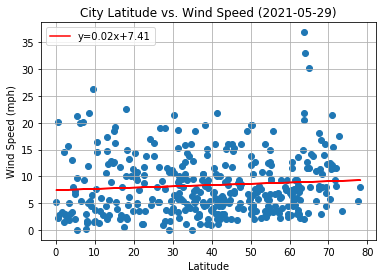

In [57]:
plot_regression(northern_df['Lat'], northern_df['Wind Speed'], 'Wind Speed', 'mph')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.2866067500592068


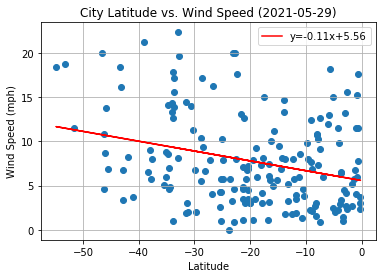

In [58]:
plot_regression(southern_df['Lat'], southern_df['Wind Speed'], 'Wind Speed', 'mph')